# Proyecto de Algotrading

### Librerías utilizadas

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import plotly.graph_objects as go

## Análisis Exploratorio de Datos (EDA) - EUR/USD (EURUSD=X)

El mercado de divisas, con pares tan significativos como EUR/USD (EURUSD=X), despierta un interés considerable entre inversores y analistas financieros debido a su influencia global y su relevancia en la economía mundial. 

### Datos

In [219]:
df = pd.read_csv('EURUSD=X.csv')
print(df.head())
print(df.info())  

         Date      Open      High       Low     Close  Adj Close  Volume
0  2023-02-20  1.068444  1.070549  1.067156  1.068444   1.068444       0
1  2023-02-21  1.068262  1.069564  1.064487  1.068262   1.068262       0
2  2023-02-22  1.065201  1.066553  1.061909  1.065201   1.065201       0
3  2023-02-23  1.060580  1.063038  1.058201  1.060580   1.060580       0
4  2023-02-24  1.059805  1.061425  1.053774  1.059805   1.059805       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       261 non-null    object 
 1   Open       261 non-null    float64
 2   High       261 non-null    float64
 3   Low        261 non-null    float64
 4   Close      261 non-null    float64
 5   Adj Close  261 non-null    float64
 6   Volume     261 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.4+ KB
None


Note que todas las variables, a excepción de 'Date', son de tipo numérico. 
Se quiere que la colmuna "Date" se reconozca como fechas

In [220]:
df["Date"] = pd.to_datetime(df["Date"])

### Resumen estadístico

In [221]:
resumen = df.describe()
resumen

,Date,Open,High,Low,Close,Adj Close,Volume
count,261,261.000000,261.000000,261.000000,261.000000,261.000000,261.0
mean,2023-08-20 04:52:24.827586304,1.082987,1.086173,1.079615,1.082989,1.082989,0.0
min,2023-02-20 00:00:00,1.047230,1.049428,1.044987,1.047230,1.047230,0.0
25%,2023-05-22 00:00:00,1.070893,1.074022,1.067578,1.070893,1.070893,0.0
50%,2023-08-21 00:00:00,1.085270,1.088732,1.081338,1.085270,1.085270,0.0
75%,2023-11-20 00:00:00,1.094595,1.097972,1.091608,1.094595,1.094595,0.0
max,2024-02-19 00:00:00,1.123760,1.127574,1.122007,1.123760,1.123760,0.0
std,NaN,0.016218,0.016095,0.016091,0.016217,0.016217,0.0


El resumen estadístico muestra que los valores de "Open" oscilan entre 1.047230 y 1.123760, con una media de 1.082987 y una desviación estándar de 0.016218. Estos valores son similares a los precios de cierre, que varían entre 1.047230 y 1.123760, con una media de 1.082989 y una desviación de 0.016217.

Por otro lado, se percibe que al menos el 75% de los días se alcanzó un precio máximo de 1.097972, mientras que el 25% del precio mínimo por día fue de 1.067578.

### Eliminación de variables innecesarias
la visualizacion de las primeras filas de datos, asi como el resumen estadistico parecen mostrar que la columna 'Volume' esta llena de 0 y que "Adj Close" y "Close" son iguales.

In [222]:
df.drop(columns=['Adj Close'], inplace=True)
if (df['Volume'] == 0).all():
    df.drop(columns=['Volume'], inplace=True)
    print(df.head())

        Date      Open      High       Low     Close
0 2023-02-20  1.068444  1.070549  1.067156  1.068444
1 2023-02-21  1.068262  1.069564  1.064487  1.068262
2 2023-02-22  1.065201  1.066553  1.061909  1.065201
3 2023-02-23  1.060580  1.063038  1.058201  1.060580
4 2023-02-24  1.059805  1.061425  1.053774  1.059805


### Variables de importancia

- **Date:** Fecha
- **Open:** Precio de apertura del mercado
- **High:** Precio máximo alcanzado durante el día
- **Low:** Precio mínimo alcanzado durante el día
- **Close:** Precio de cierre del mercado


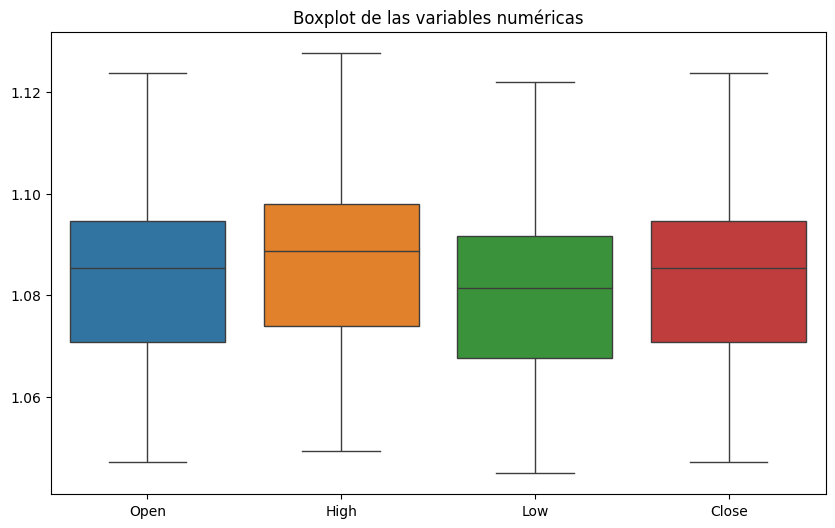

In [223]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Date']))
plt.title('Boxplot de las variables numéricas')
plt.show()

En primera instancia, se percibe que no hay presencia de datos atípicos. Además, se puede decir que todas las variables parecen presentar una distribución leptocúrtica y asimétrica negativa.

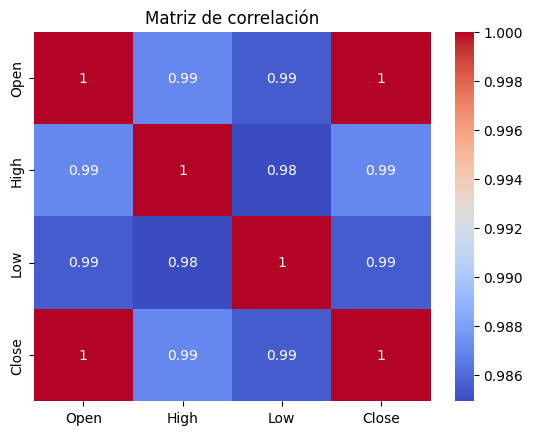

In [224]:
ValNum = df.select_dtypes(include=['float64', 'int64'])
matrizCor = ValNum.corr()
sns.heatmap(matrizCor, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Las variables estan altamente correlacionadas. 

### Variación diaria del precio

In [225]:
df['Daily_Variation'] = df['High'] - df['Low']
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df['Date'],
    y=df['Daily_Variation'],
    marker_color='rgba(255, 165, 0, 0.8)', 
    marker_line_color='rgb(255, 165, 0)', 
    marker_line_width=1.5, 
    width=0.5
))

fig.update_layout(
    title='Variación Diaria de Precios EUR/USD',
    xaxis=dict(title='Fecha'),
    yaxis=dict(title='Variación Diaria'),
    bargap=0.05, 
    plot_bgcolor='rgba(0,0,0,0)' 
)
print("Variación Diaria de Precios EUR/USD")

Variación Diaria de Precios EUR/USD


![variacion](Variacion.png)

Se observa que la amplitud de la volatilidad intradía es baja ya que la diferencia entre el máximo y el mínimo precio oscila entre 0.01 y 0.005, esto indica que hay estabilidad en el mercado. Sin embargo, el día con la mayor variación fue el 15 de marzo del 2023 con un 0.0225, seguido del 14 de noviembre del 2023 con una variación de 0.017.

### Volatilidad

Volatilidad (Desviación Estándar) de los Retornos Diarios: 0.44%
Volatilidad (Desviación Estándar) de la Variación Diaria: 0.00


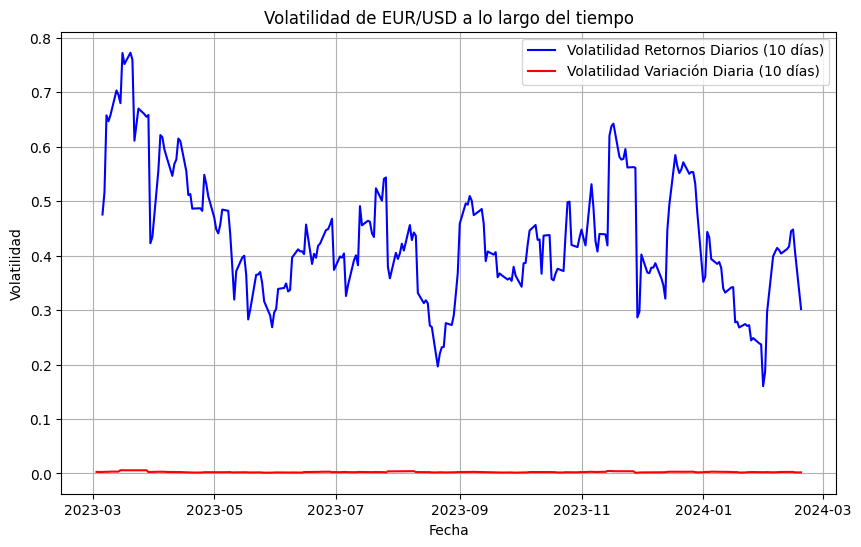

In [226]:
df['Daily_Return'] = df['Close'].pct_change() * 100 
df['Daily_Variation'] = df['High'] - df['Low']  

daily_volatility = df['Daily_Return'].std()

daily_variation_volatility = df['Daily_Variation'].std()

print("Volatilidad (Desviación Estándar) de los Retornos Diarios: {:.2f}%".format(daily_volatility))
print("Volatilidad (Desviación Estándar) de la Variación Diaria: {:.2f}".format(daily_variation_volatility))

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Daily_Return'].rolling(window=10).std(), color='blue', label='Volatilidad Retornos Diarios (10 días)')
plt.plot(df['Date'], df['Daily_Variation'].rolling(window=10).std(), color='red', label='Volatilidad Variación Diaria (10 días)')
plt.title('Volatilidad de EUR/USD a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.legend()
plt.grid(True)
plt.show()

En primer lugar, se observa que en promedio los retornos diarios del EUR/USD varían al rededor del 0.44%, esto significa que los retornos diarios de estas monedas pueden experimentar fluctuaciones con respecto a su valor promedio. Por otro lado, la variación diaria de los precios es muy bajo o incluso nula, esto indica una falta de movimiento de los precios de un día a otro.

### Evolución del precio de cierre en el tiempo

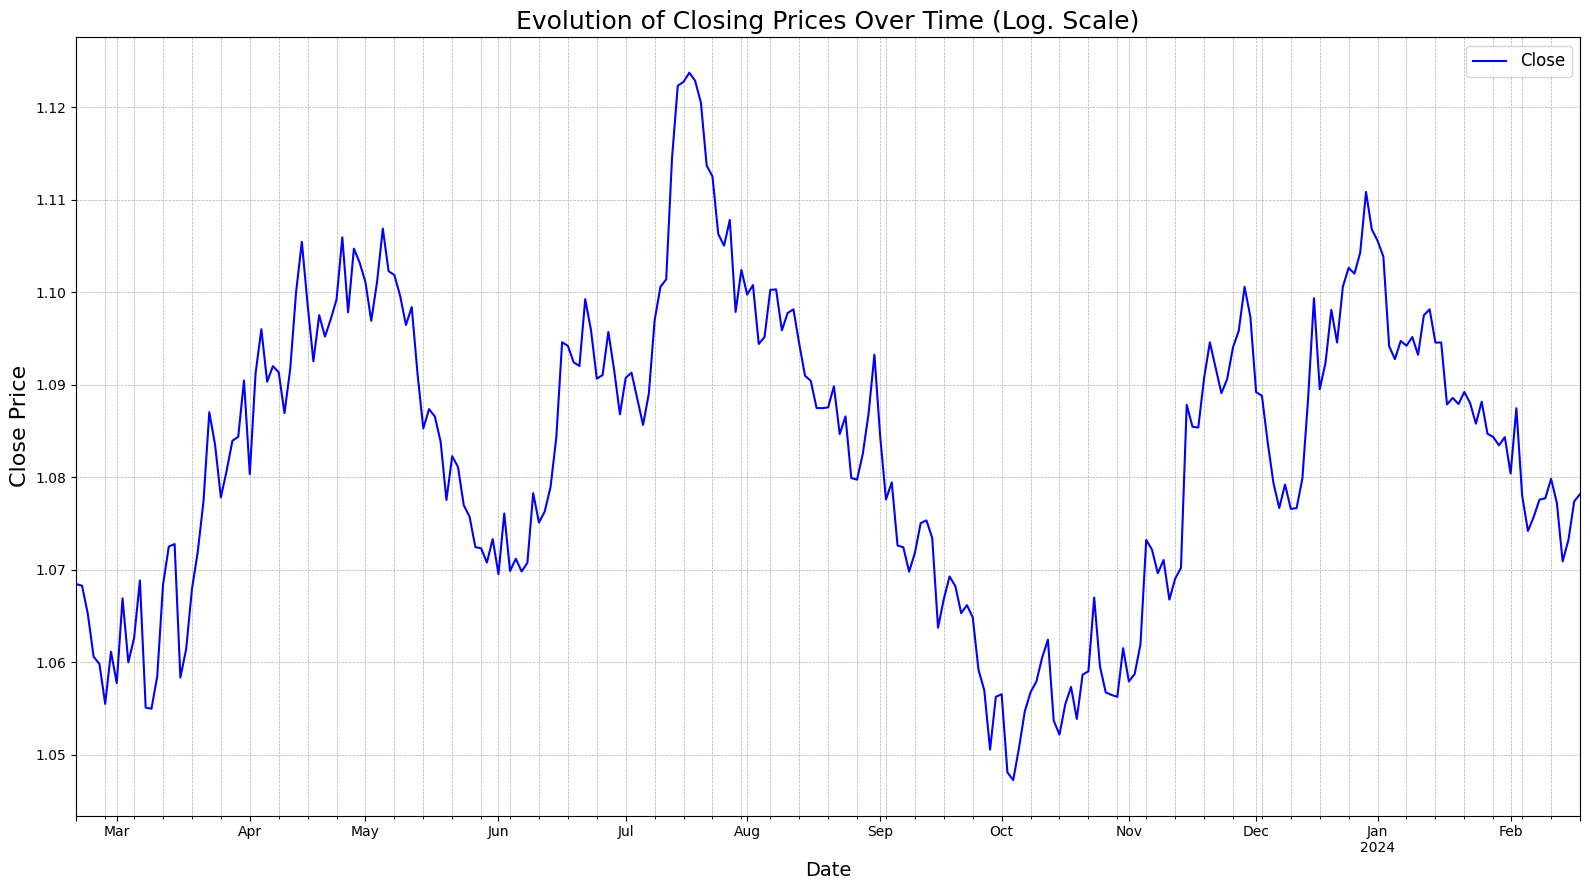

In [227]:
fig, ax = plt.subplots(figsize=(16, 9))

df.set_index('Date')['Close'].plot(ax=ax, color='blue', linewidth=1.5)

ax.set_title('Evolution of Closing Prices Over Time (Log. Scale)', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Close Price', fontsize=16)
ax.legend(fontsize=12)

ax.grid(which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Se puede observar que durante los mese junio y julio del 2023 los precios de cierre experimentaron una tendencia alcista alcanzando un máximo en 1.12, sin embargo, luego se presentó una tendencia bajista hasta el mes de octubre del 2023 alcanzando un mínimo de 1.05. Posteriormente el precio volvió a subir alcanzando el mismo precio que en abril del 2023.

### Canddlestick

In [228]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='Gráfico de Velas de EUR/USD',
                   xaxis_title='Fecha',
                   yaxis_title='Precio',
                   xaxis_rangeslider_visible=True)

print("Gráfico de Velas de EUR/USD")

Gráfico de Velas de EUR/USD


![EURO](EURO.png)

Al igual que en los gráficos anteriores, en este canddlestick se puede confirmar la tendencia alcista del precio en los meses de junio y julio del 2023 gracias a la acumulación de velas verdes en esa zona, y la posterior tendencia bajista, la cual se puede identificar por la acumulación de velas rojas, hasta el mes de octubre del 2023.

### Canddlestick con medias móviles

In [229]:
df['ma10'] = df['Close'].rolling(window=10).mean()
df['ma20'] = df['Close'].rolling(window=20).mean()

df['color'] = df.apply(lambda row: 'green' if row['Close'] >= row['Open'] else 'red', axis=1)

trace1 = go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Price',
    yaxis='y1'
)

trace2 = go.Scatter(
    x=df['Date'],
    y=df['ma10'],
    mode='lines',
    line=dict(color='royalblue', width=1),
    name='10-day MA',
    yaxis='y1'
)

trace3 = go.Scatter(
    x=df['Date'],
    y=df['ma20'],
    mode='lines',
    line=dict(color='blue', width=1),
    name='20-day MA',
    yaxis='y1'
)

layout = go.Layout(
    title='Candlestick EUR/USD con medias móviles',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    xaxis_rangeslider_visible=True,
    legend=dict(orientation="h", yanchor="bottom", y=-0.15, xanchor="center", x=0.5)
)

# Crear y mostrar el gráfico
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
print("Candlestick EUR/USD con medias móviles")

Candlestick EUR/USD con medias móviles


![Candlestick](candlestick.png)

En este gráfico se puede observar que usando un periodo de 20 días, se identifican 3 momentos donde el precio experimentó una tendencia alcista, ya que las velas se encuentran por encima de la media móvil, estos son: entre marzo 2023 y mayo 2023, entre julio 2023 y julio 2023, y entre noviembre 2023 y enero 2024. Por otro lado, el periodo de tiempo más largo donde el precio experimentó una tendencia bajista fue desde agosto 2023 hasta octubre 2023. Asimismo, estas observaciones se pueden corroborar observando el cruce de las medias móviles, idicando el cambio de tendencia alcista-bajista o viceversa.

## Estrategia de Algotrading: SMA + A/D

La estrategia de trading emplea la combinación de la media móvil simple (SMA) y el indicador de acumulación/distribución (A/D) para generar señales de compra y venta en el mercado financiero. Las características principales de la estrategia son las siguientes: 

  

**Señal de Compra:** 

  

- Cuando la mecha inferior de una vela cruza por debajo de la SMA, se considera una señal potencial de compra. 

  

- Antes de ejecutar la operación, se verifica la confirmación de esta señal observando el comportamiento del indicador A/D. Si el A/D muestra una tendencia alcista o acumulación durante la formación de la vela, se confirma la señal de compra. 

  

**Señal de Venta:** 

  

- Después de abrir una posición de compra, se monitorea el mercado en busca de una señal de venta. 

  

- Si durante la tendencia alcista, alguna parte de las velas posteriores toca la línea SMA, indicando una corrección, se observa el comportamiento del A/D. 

  

- Una disminución significativa o distribución en el A/D durante la corrección confirma la señal de venta. 

  

**Detección de Divergencias:** 

  

- Mientras se mantiene una posición de compra, se analiza la relación entre el precio y el indicador A/D. 

  

- Si el precio continúa aumentando pero el A/D muestra signos de debilidad o diverge de la dirección del precio (divergencia negativa), se considera cerrar la posición de compra y buscar oportunidades de venta. 

  

Para optimizar la estrategia, es posible ajustar los siguientes parámetros de cada indicador: 

  

**Media Móvil Simple (SMA):** 

  

- Período de la SMA: Experimentar con diferentes períodos de tiempo para calcular la SMA y determinar cuál se adapta mejor al marco temporal y las condiciones del mercado. 

  

- Tipo de Precio: Variar el tipo de precio utilizado en el cálculo de la SMA para evaluar su impacto en la precisión de las señales de compra y venta. 

  

**Indicador de Acumulación/Distribución (A/D):** 

  

- Período del A/D: Ajustar el número de períodos utilizados para calcular el A/D y encontrar la configuración óptima que genere las señales más precisas. 

  

- Tipo de Volumen: Probar diferentes tipos de volumen utilizados en el cálculo del A/D para determinar cuál proporciona una mejor correlación con el precio y mejores señales de trading. 

  

Para optimizar la estrategia de trading utilizando la media móvil simple (SMA) y el indicador de acumulación/distribución (A/D), se buscará ajustar los parámetros de cada indicador: 

  

**Media Móvil Simple (SMA):** 

  

- *Período de la SMA:* Este es el número de períodos de tiempo utilizados para calcular la media móvil. Se pueden probar diferentes períodos para determinar cuál funciona mejor en el marco temporal y las condiciones del mercado. 

  

- *Tipo de Precio:* La SMA se puede calcular utilizando diferentes tipos de precios, como el precio de cierre, el precio máximo, el precio mínimo, etc. Se pueden experimentar con diferentes tipos de precios para evaluar su impacto en la precisión de las señales de compra y venta. 

  

**Indicador de Acumulación/Distribución (A/D):** 

  

- *Período del A/D:* Al igual que con la SMA, se pueden ajustar el número de períodos utilizados para calcular el A/D. Experimentar con diferentes períodos puede ayudar a encontrar la configuración óptima que genere las señales más precisas. 

  

- *Tipo de Volumen:* El A/D se basa en el volumen de negociación. Se pueden probar diferentes tipos de volumen, como el volumen total, el volumen ponderado, etc., para determinar cuál proporciona una mejor correlación con el precio y mejores señales de trading. 

## Revisión de Literatura

Para la elaboración de la estrategia de algotrading que se propone, se consultaron los siguientes documentos.

- Chen, Y., Liu, K., Xie, Y., & Hu, M. (2020). Financial Trading Strategy System Based on Machine Learning. Mathematical Problems in Engineering, 2020, 1–13. https://doi.org/10.1155/2020/3589198

- Dash, R., & Pradipta Kishore Dash. (2016). A hybrid stock trading framework integrating technical analysis with machine learning techniques. The Journal of Finance and Data Science, 2(1), 42–57. https://doi.org/10.1016/j.jfds.2016.03.002

- Felipe Dias Paiva, Tomás, R., Gustavo Peixoto Hanaoka, & Wendel Moreira Duarte. (2019). Decision-making for financial trading: A fusion approach of machine learning and portfolio selection. Expert Systems with Applications, 115, 635–655. https://doi.org/10.1016/j.eswa.2018.08.003

- Frattini, A., Bianchini, I., Alessio Garzonio, & Mercuri, L. (2022). Financial Technical Indicator and Algorithmic Trading Strategy Based on Machine Learning and Alternative Data. Risks, 10(12), 225–225. https://doi.org/10.3390/risks10120225

- ‌Felipe Dias Paiva, Tomás, R., Gustavo Peixoto Hanaoka, & Wendel Moreira Duarte. (2019). Decision-making for financial trading: A fusion approach of machine learning and portfolio selection. Expert Systems with Applications, 115, 635–655. https://doi.org/10.1016/j.eswa.2018.08.003


‌
‌
‌

## Mockup - Dashboard

![Mockup](mockup.jpg)
